<a href="https://colab.research.google.com/github/aya-se/advanced-machine-learning-2022/blob/main/shimosaka_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# Datasets

In [77]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

# Problem 1

In [78]:
# パラメータの設定
n = 200
lam = 1e-1
lr = 1e-2
eps = 1e-5

# 損失関数J(w_t)の定義
def J(w_t):
    val = lam * w_t @ w_t.T
    for i in range(n):
        val += np.log(1 + np.exp(-y_d4[i] * w_t @ x_d4[i].T))
    return val

#J(w_t)の1階微分の計算
def grad_J(w_t):
    val = 2 * lam * w_t
    for i in range(n):
        val += np.exp(-y_d4[i] * w_t @ x_d4[i].T) * (-y_d4[i] * x_d4[i]) / (1 + np.exp(-y_d4[i] * w_t @ x_d4[i].T))
    return val
        
# 最急降下法による更新
w_t = np.array([1/2 for i in range(4)]) # 適当に初期化
loss_hist_batch = [] # to store the history of loss J(w_t)
loss_hist_batch.append(J(w_t))

while True:
    prev = J(w_t)
    d = -grad_J(w_t)
    w_t += lr * d
    loss_hist_batch.append(J(w_t))
    if abs(J(w_t) - prev) <= eps:
        break

In [79]:
#J(w_t)の2階微分の計算
def grad_J2(w_t):
    val = 2 * lam * np.ones([4,4])
    for i in range(n):
        val += np.exp(-y_d4[i] * w_t @ x_d4[i].T) * (-y_d4[i] * x_d4[i])**2  / (1 + np.exp(-y_d4[i] * w_t @ x_d4[i].T))**2
    return val

# ニュートン法による更新
w_t = np.array([1/(i+1) for i in range(4)]) # 適当に初期化
loss_hist_newton = [] # to store the history of loss J(w_t)
loss_hist_newton.append(J(w_t))

while True:
    prev = J(w_t)
    d = (-grad_J2(w_t)**-1 @ grad_J(w_t)).squeeze()
    w_t += lr * d
    loss_hist_newton.append(J(w_t))
    if abs(J(w_t) - prev) <= eps:
        break

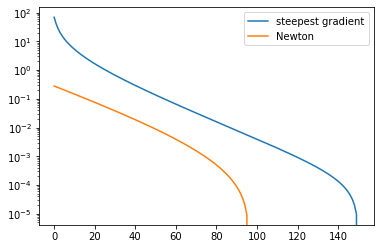

In [80]:
# plot the result
plt.plot(loss_hist_batch - loss_hist_batch[-1], label="steepest gradient")
plt.plot(loss_hist_newton - loss_hist_newton[-1], label="Newton")
plt.legend()
plt.yscale("log")

# Problem 2

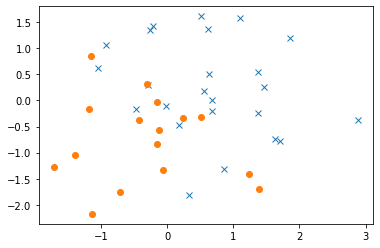

In [81]:
# prepare dataset
np.random.seed(3846)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n, 2) + 0
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')

In [82]:
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

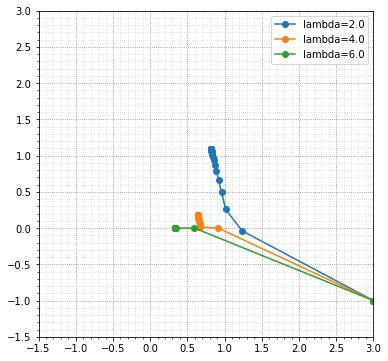

In [83]:
# パラメータの設定
w_hat_lams = []
lams = [2.0, 4.0, 6.0]
L = np.max(np.linalg.eig(2 * A)[0])

# define prox function
def prox(mu, lam):
  val = np.zeros(mu.shape)
  for i in range(len(mu)):
    if mu[i] > lam:
      val[i] = mu[i] - lam
    elif np.abs(mu[i]) < lam:
      val[i] = 0
    else:
      val[i] = mu[i] + lam 
  return val

for lam in lams:
  ### implement PG ###
  lr = lam / L
  w_t = np.array([[3], [-1]]) # 適当に初期化
  w_hat_lam = []
  w_hat_lam.append(w_t.T)
  for k in range(100):
    grad = 2 * A @ (w_t - mu)
    w_t = prox(w_t - grad / L, lr)
    w_hat_lam.append(w_t.T)
  w_hat_lams.append(np.vstack(w_hat_lam))
  ###

plt.figure(figsize=(6,6))
plt.plot(w_hat_lams[0][:,0], w_hat_lams[0][:,1], "o-", label="lambda=2.0")
plt.plot(w_hat_lams[1][:,0], w_hat_lams[1][:,1], "o-", label="lambda=4.0")
plt.plot(w_hat_lams[2][:,0], w_hat_lams[2][:,1], "o-", label="lambda=6.0")
plt.xlim(-1.5, 3)
plt.ylim(-1.5, 3)
plt.minorticks_on()
plt.grid(which="minor", color="lightgray", linestyle="dotted")
plt.grid(which="major", color="gray", linestyle="dotted")
plt.legend()